In [1]:
%%time
import malaya

CPU times: user 6.4 s, sys: 1.6 s, total: 7.99 s
Wall time: 12.8 s


## Describe supported dependencies

In [2]:
malaya.describe_dependency()

acl - clausal modifier of noun
advcl - adverbial clause modifier
advmod - adverbial modifier
amod - adjectival modifier
appos - appositional modifier
aux - auxiliary
case - case marking
ccomp - clausal complement
compound - compound
compound:plur - plural compound
conj - conjunct
cop - cop
csubj - clausal subject
dep - dependent
det - determiner
fixed - multi-word expression
flat - name
iobj - indirect object
mark - marker
nmod - nominal modifier
nsubj - nominal subject
obj - direct object
parataxis - parataxis
root - root
xcomp - open clausal complement
you can read more from https://universaldependencies.org/treebanks/id_pud/index.html


In [3]:
string = 'Dr Mahathir menasihati mereka supaya berhenti berehat dan tidur sebentar sekiranya mengantuk ketika memandu.'

## List available transformer Dependency models

In [4]:
malaya.dependency.available_transformer_model()

{'bert': ['base'], 'xlnet': ['base'], 'albert': ['base']}

Make sure you can check accuracy chart from here first before select a model, https://malaya.readthedocs.io/en/latest/Accuracy.html#dependency-parsing

**The best model in term of accuracy is XLNET**.

## Load xlnet dependency model

In [5]:
model = malaya.dependency.transformer(model = 'xlnet', size = 'base')

W1017 22:05:38.566553 4363621824 deprecation_wrapper.py:119] From /Users/huseinzol/Documents/Malaya/malaya/_utils/_utils.py:68: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

W1017 22:05:38.568574 4363621824 deprecation_wrapper.py:119] From /Users/huseinzol/Documents/Malaya/malaya/_utils/_utils.py:69: The name tf.GraphDef is deprecated. Please use tf.compat.v1.GraphDef instead.

W1017 22:05:43.521211 4363621824 deprecation_wrapper.py:119] From /Users/huseinzol/Documents/Malaya/malaya/_utils/_utils.py:64: The name tf.InteractiveSession is deprecated. Please use tf.compat.v1.InteractiveSession instead.



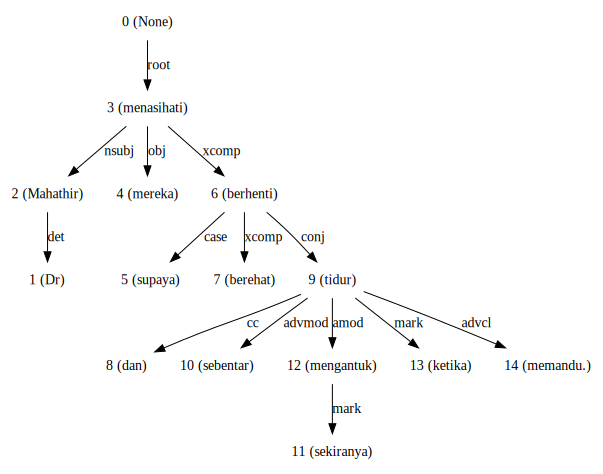

In [6]:
d_object, tagging, indexing = model.predict(string)
d_object.to_graphvis()

## Voting stack model

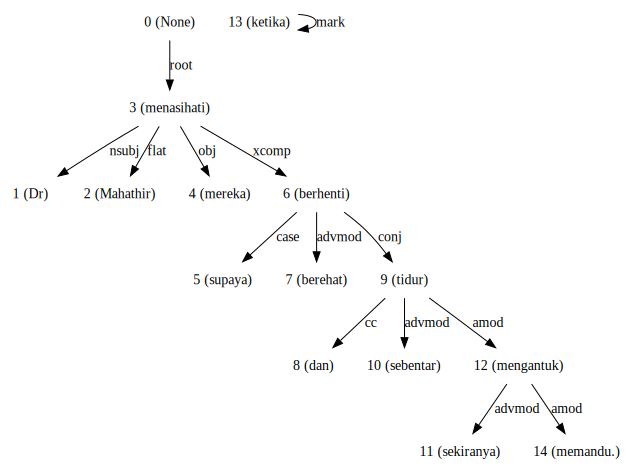

In [7]:
bert = malaya.dependency.transformer(model = 'bert', size = 'base')
tagging, indexing = malaya.stack.voting_stack([model, bert, model], string)
malaya.dependency.dependency_graph(tagging, indexing).to_graphvis()

## Dependency graph object

To initiate a dependency graph from dependency models, you need to call `malaya.dependency.dependency_graph`.

In [8]:
graph = malaya.dependency.dependency_graph(tagging, indexing)
graph

#### generate graphvis

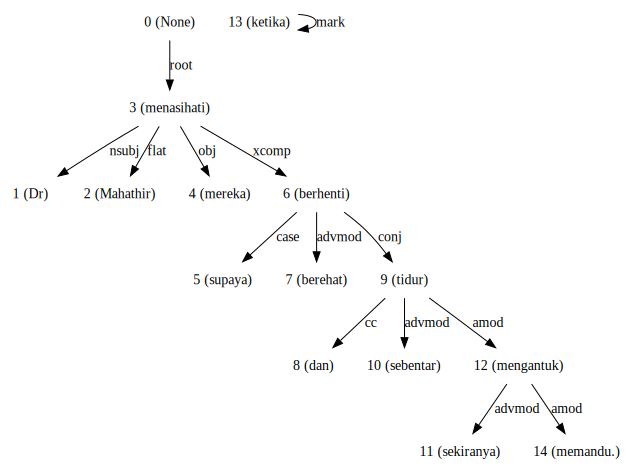

In [9]:
graph.to_graphvis()

#### Get nodes

In [10]:
graph.nodes

defaultdict(<function malaya._utils._parse_dependency.DependencyGraph.__init__.<locals>.<lambda>()>,
            {0: {'address': 0,
              'word': None,
              'lemma': None,
              'ctag': 'TOP',
              'tag': 'TOP',
              'feats': None,
              'head': None,
              'deps': defaultdict(list, {'root': [3]}),
              'rel': None},
             1: {'address': 1,
              'word': 'Dr',
              'lemma': '_',
              'ctag': '_',
              'tag': '_',
              'feats': '_',
              'head': 3,
              'deps': defaultdict(list, {}),
              'rel': 'nsubj'},
             3: {'address': 3,
              'word': 'menasihati',
              'lemma': '_',
              'ctag': '_',
              'tag': '_',
              'feats': '_',
              'head': 0,
              'deps': defaultdict(list,
                          {'nsubj': [1],
                           'flat': [2],
                      

#### Flat the graph

In [11]:
list(graph.triples())

[(('menasihati', '_'), 'nsubj', ('Dr', '_')),
 (('menasihati', '_'), 'flat', ('Mahathir', '_')),
 (('menasihati', '_'), 'obj', ('mereka', '_')),
 (('menasihati', '_'), 'xcomp', ('berhenti', '_')),
 (('berhenti', '_'), 'case', ('supaya', '_')),
 (('berhenti', '_'), 'advmod', ('berehat', '_')),
 (('berhenti', '_'), 'conj', ('tidur', '_')),
 (('tidur', '_'), 'cc', ('dan', '_')),
 (('tidur', '_'), 'advmod', ('sebentar', '_')),
 (('tidur', '_'), 'amod', ('mengantuk', '_')),
 (('mengantuk', '_'), 'advmod', ('sekiranya', '_')),
 (('mengantuk', '_'), 'amod', ('memandu.', '_'))]

#### Check the graph contains cycles

In [12]:
graph.contains_cycle()

False

#### Generate networkx

Make sure you already installed networkx, `pip install networkx`

In [13]:
digraph = graph.to_networkx()
digraph

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
nx.draw_networkx(digraph)
plt.show()

<Figure size 640x480 with 1 Axes>

In [15]:
digraph.edges()

OutMultiEdgeDataView([(1, 3), (2, 3), (4, 3), (5, 6), (6, 3), (7, 6), (8, 9), (9, 6), (10, 9), (11, 12), (12, 9), (13, 13), (14, 12)])

In [16]:
digraph.nodes()

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14))

In [17]:
labels = {i:graph.get_by_address(i)['word'] for i in digraph.nodes()}
labels

{1: 'Dr',
 2: 'Mahathir',
 3: 'menasihati',
 4: 'mereka',
 5: 'supaya',
 6: 'berhenti',
 7: 'berehat',
 8: 'dan',
 9: 'tidur',
 10: 'sebentar',
 11: 'sekiranya',
 12: 'mengantuk',
 13: 'ketika',
 14: 'memandu.'}

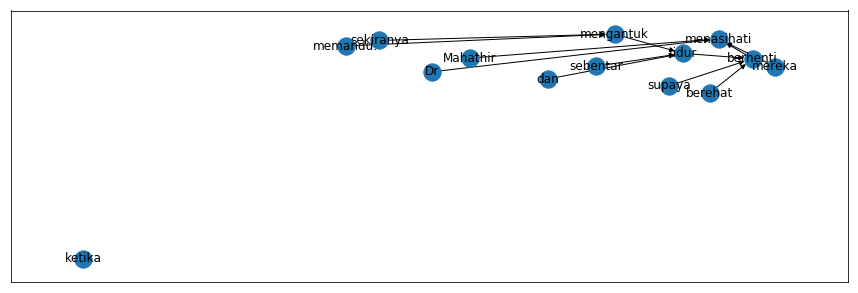

In [18]:
plt.figure(figsize=(15,5))
nx.draw_networkx(digraph,labels=labels)
plt.show()